In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from pyrl.agents.classic import QLearning as ClassicQLearning
from pyrl.agents.survival import QLearning as SurvivalQLearning, CDELearning
from pyrl import Sim

In [2]:
map_size = 50
horizon = 5000
repeat = 100
survival_threshold = 100
points = 15

env = gym.make("pyrl.environments:Survival-v0", size=map_size)

def episode_callback(env, agent):
    pass

budgets = np.linspace(100, horizon, points, dtype=int)

## CDELearning

In [3]:
"""cde_time_mean = np.full(budgets.shape, -1)
cde_exploration_rate = np.full(budgets.shape, -1)
cde_alive_rate = np.full(budgets.shape, -1)
cde_budget_evolutions = list()

for i, b in enumerate(budgets):
    nb_alive = 0
    for j in range(repeat):
        print(f"====> CDE {b} | Try {j + 1}")
        agent = CDELearning(env.observation_space, env.action_space, survival_threshold, survival_threshold+100, budget=b)
        sim = Sim(agent, env, episode_horizon=horizon, episode_finished_callback=episode_callback)
        sim.run()

        if cde_time_mean[i] == -1:
            cde_time_mean[i] = sim.metrics["time"]
        else:
            cde_time_mean[i] = cde_time_mean[i] + (1/j) * (sim.metrics["time"] - cde_time_mean[i])
        
        exploration_rate = (np.count_nonzero(sim.metrics["exploration"]) / (env.observation_space.n * env.action_space.n)) * 100

        if cde_exploration_rate[i] == -1:
            cde_exploration_rate[i] = exploration_rate
        else:
            cde_exploration_rate[i] = cde_exploration_rate[i] + (1 / j) * (exploration_rate - cde_exploration_rate[i])

        if agent.budget > 0:
            nb_alive = nb_alive + 1

        cde_alive_rate[i] = nb_alive / (j+1) * 100

        print(f"Time mean : {cde_time_mean[i]}")
        print(f"Alive rate : {cde_alive_rate[i]}%")
"""

'cde_time_mean = np.full(budgets.shape, -1)\ncde_exploration_rate = np.full(budgets.shape, -1)\ncde_alive_rate = np.full(budgets.shape, -1)\ncde_budget_evolutions = list()\n\nfor i, b in enumerate(budgets):\n    nb_alive = 0\n    for j in range(repeat):\n        print(f"====> CDE {b} | Try {j + 1}")\n        agent = CDELearning(env.observation_space, env.action_space, survival_threshold, survival_threshold+100, budget=b)\n        sim = Sim(agent, env, episode_horizon=horizon, episode_finished_callback=episode_callback)\n        sim.run()\n\n        if cde_time_mean[i] == -1:\n            cde_time_mean[i] = sim.metrics["time"]\n        else:\n            cde_time_mean[i] = cde_time_mean[i] + (1/j) * (sim.metrics["time"] - cde_time_mean[i])\n        \n        exploration_rate = (np.count_nonzero(sim.metrics["exploration"]) / (env.observation_space.n * env.action_space.n)) * 100\n\n        if cde_exploration_rate[i] == -1:\n            cde_exploration_rate[i] = exploration_rate\n        e

## Classic QLearning

In [4]:
qclassic_time_mean = np.full(budgets.shape, -1)
qclassic_exploration_rate = np.full(budgets.shape, -1)
qclassic_alive_rate = np.full(budgets.shape, -1)
qclassic_budget_evolutions = list()

for i, b in enumerate(budgets):
    nb_alive = 0
    for j in range(repeat):
        print(f"====> Classic QLearning {b} | Try {j + 1}")
        agent = ClassicQLearning(env.observation_space, env.action_space, budget=b)
        sim = Sim(agent, env, episode_horizon=horizon, episode_finished_callback=episode_callback)
        sim.run()

        if qclassic_time_mean[i] == -1:
            qclassic_time_mean[i] = sim.metrics["time"]
        else:
            qclassic_time_mean[i] = qclassic_time_mean[i] + (1/j) * (sim.metrics["time"] - qclassic_time_mean[i])
        
        exploration_rate = (np.count_nonzero(sim.metrics["exploration"]) / (env.observation_space.n * env.action_space.n)) * 100

        if qclassic_exploration_rate[i] == -1:
            qclassic_exploration_rate[i] = exploration_rate
        else:
            qclassic_exploration_rate[i] = qclassic_exploration_rate[i] + (1 / j) * (exploration_rate - qclassic_exploration_rate[i])

        if agent.budget > 0:
            nb_alive = nb_alive + 1

        qclassic_alive_rate[i] = nb_alive / (j+1) * 100

        print(f"Time mean : {qclassic_time_mean[i]}")
        print(f"Alive rate : {qclassic_alive_rate[i]}%")

====> Classic QLearning 100 | Try 1
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 2
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 3
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 4
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 5
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 6
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 7
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 8
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 9
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 10
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 11
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 12
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 13
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 14
Time mean : 100
Alive rate : 0%
====> Classic QLearning 100 | Try 15
Time m

## Survival QLearning

In [5]:
qsurvival_time_mean = np.full(budgets.shape, -1)
qsurvival_exploration_rate = np.full(budgets.shape, -1)
qsurvival_alive_rate = np.full(budgets.shape, -1)
qsurvival_budget_evolutions = list()

for i, b in enumerate(budgets):
    nb_alive = 0
    for j in range(repeat):
        print(f"====> Survival QLearning {b} | Try {j + 1}")
        agent = SurvivalQLearning(env.observation_space, env.action_space, survival_threshold=survival_threshold, budget=b)
        sim = Sim(agent, env, episode_horizon=horizon, episode_finished_callback=episode_callback)
        sim.run()

        if qsurvival_time_mean[i] == -1:
            qsurvival_time_mean[i] = sim.metrics["time"]
        else:
            qsurvival_time_mean[i] = qsurvival_time_mean[i] + (1/j) * (sim.metrics["time"] - qsurvival_time_mean[i])
        
        exploration_rate = (np.count_nonzero(sim.metrics["exploration"]) / (env.observation_space.n * env.action_space.n)) * 100

        if qsurvival_exploration_rate[i] == -1:
            qsurvival_exploration_rate[i] = exploration_rate
        else:
            qsurvival_exploration_rate[i] = qsurvival_exploration_rate[i] + (1 / j) * (exploration_rate - qsurvival_exploration_rate[i])

        if agent.budget > 0:
            nb_alive = nb_alive + 1

        qsurvival_alive_rate[i] = nb_alive / (j+1) * 100

        print(f"Time mean : {qsurvival_time_mean[i]}")
        print(f"Alive rate : {qsurvival_alive_rate[i]}%")

====> Survival QLearning 100 | Try 1
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 2
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 3
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 4
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 5
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 6
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 7
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 8
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 9
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 10
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 11
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 12
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 13
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 | Try 14
Time mean : 100
Alive rate : 0%
====> Survival QLearning 100 

## Results

### Survival time

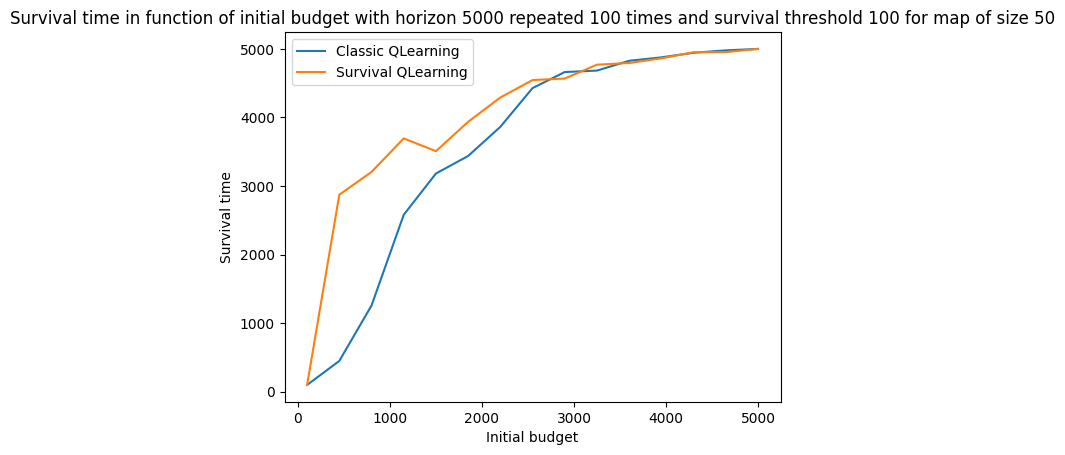

In [6]:
#plt.plot(budgets, cde_time_mean, label="CDELearning")
plt.plot(budgets, qclassic_time_mean, label="Classic QLearning")
plt.plot(budgets, qsurvival_time_mean, label="Survival QLearning")
plt.xlabel("Initial budget")
plt.ylabel("Survival time")
plt.legend()
plt.title(f"Survival time in function of initial budget with horizon {horizon} repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

### Alive rate

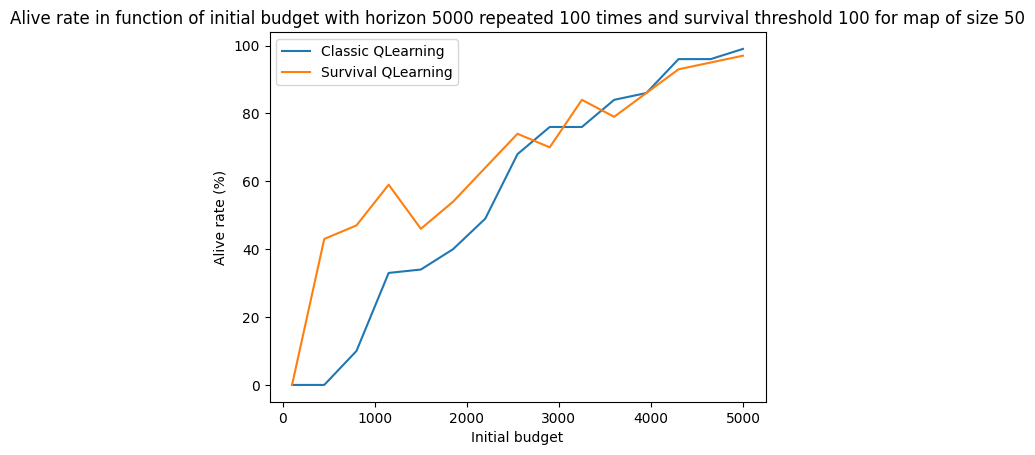

In [7]:
#plt.plot(budgets, cde_alive_rate, label="CDELearning")
plt.plot(budgets, qclassic_alive_rate, label="Classic QLearning")
plt.plot(budgets, qsurvival_alive_rate, label="Survival QLearning")
plt.xlabel("Initial budget")
plt.ylabel("Alive rate (%)")
plt.legend()
plt.title(f"Alive rate in function of initial budget with horizon {horizon} repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

### Exploration rate

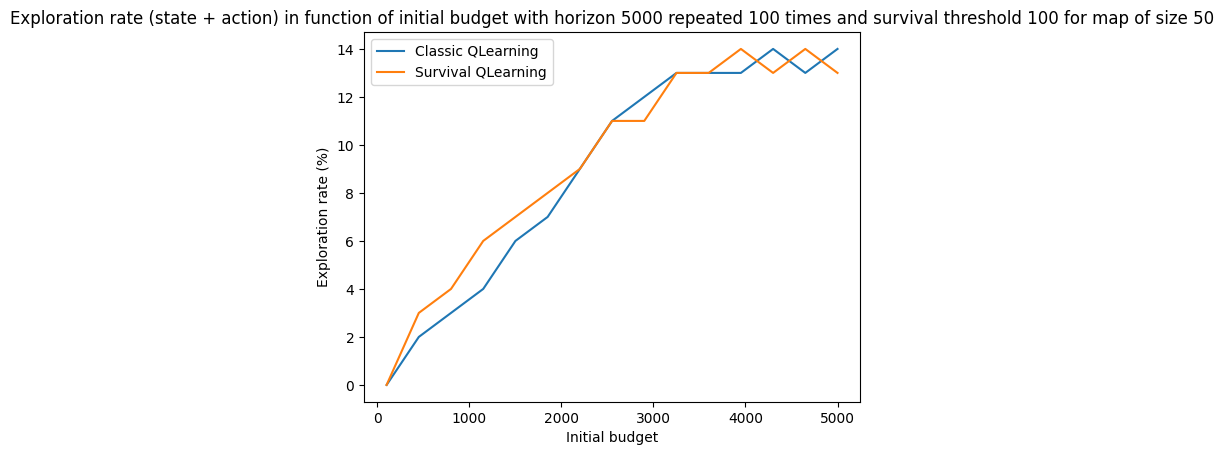

In [8]:
#plt.plot(budgets, cde_exploration_rate, label="CDELearning")
plt.plot(budgets, qclassic_exploration_rate, label="Classic QLearning")
plt.plot(budgets, qsurvival_exploration_rate, label="Survival QLearning")
plt.xlabel("Initial budget")
plt.ylabel("Exploration rate (%)")
plt.legend()
plt.title(f"Exploration rate (state + action) in function of initial budget with horizon {horizon} repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()